In [16]:
import numpy as np
from lr_utils import load_dataset
import matplotlib.pyplot as plt

In [17]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [18]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [19]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [20]:
def initialize_params(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_prop(X, w, b):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return A

def backward_prop(A, Xtrain, Ytrain):
    m = Xtrain.shape[1]
    dZ = A - Ytrain
    dw = 1/m * np.dot(Xtrain, dZ.T)
    db = 1/m * np.sum(dZ)
    
    return dw, db

def optimize(Xtrain, Ytrain, w, b, num_iterations, learning_rate):
    m = Xtrain.shape[1]
    costs = []
    for i in range(num_iterations):
        A = forward_prop(Xtrain, w, b)
        dw, db = backward_prop(A, Xtrain, Ytrain)
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        costs.append(np.sum(-1/m * ((Ytrain*np.log(A)) + ((1-Ytrain)*np.log(1-A)))))
        
        if (i) % 100 == 0:
            cost = np.sum(-1/m * ((Ytrain*np.log(A)) + ((1-Ytrain)*np.log(1-A))))
            print("Iteration: {}    Cost: {}".format(i, cost))
    return w, b, costs    

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    for i in range(A.shape[1]):

        if A[0][i] <= 0.5:
            pass
        else:
            Y_prediction[0][i] = 1
    return Y_prediction

In [21]:
def model(Xtrain, Ytrain, Xtest, Ytest, num_iterations=2000, learning_rate=0.5):
    n = Xtrain.shape[0]
    w, b = initialize_params(n)
    
    w, b, costs = optimize(Xtrain, Ytrain, w, b, num_iterations, learning_rate)

    Y_prediction_test = predict(w, b, Xtest)
    Y_prediction_train = predict(w, b, Xtrain)
    
    print("Train Accuracy: {}".format(100 - np.mean(np.abs(Y_prediction_train - Ytrain)) * 100))
    print("Test Accuracy: {}".format(100 - np.mean(np.abs(Y_prediction_test - Ytest)) * 100))
    
    return costs

In [22]:
costs = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005)

Iteration: 0    Cost: 0.6931471805599452
Iteration: 100    Cost: 0.5845083636993087
Iteration: 200    Cost: 0.46694904094655465
Iteration: 300    Cost: 0.37600686694802077
Iteration: 400    Cost: 0.3314632893282512
Iteration: 500    Cost: 0.3032730674743829
Iteration: 600    Cost: 0.2798795865826048
Iteration: 700    Cost: 0.2600421369258757
Iteration: 800    Cost: 0.24294068467796617
Iteration: 900    Cost: 0.22800422256726072
Iteration: 1000    Cost: 0.21481951378449643
Iteration: 1100    Cost: 0.20307819060644994
Iteration: 1200    Cost: 0.19254427716706854
Iteration: 1300    Cost: 0.1830333379688351
Iteration: 1400    Cost: 0.1743985943844888
Iteration: 1500    Cost: 0.16652139705400332
Iteration: 1600    Cost: 0.15930451829756614
Iteration: 1700    Cost: 0.15266732471296512
Iteration: 1800    Cost: 0.14654223503982333
Iteration: 1900    Cost: 0.14087207570310162
Train Accuracy: 99.04306220095694
Test Accuracy: 70.0


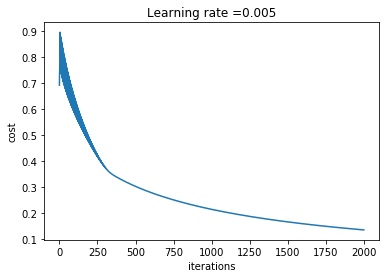

In [30]:
costs = np.squeeze(costs)
plt.plot(costs[:])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.005))
plt.show()
plt.show()

learning rate is: 0.01
Iteration: 0    Cost: 0.6931471805599452
Iteration: 100    Cost: 0.8239208681601369
Iteration: 200    Cost: 0.41894372058616236
Iteration: 300    Cost: 0.6173497063912883
Iteration: 400    Cost: 0.522115767197924
Iteration: 500    Cost: 0.3877087459646933
Iteration: 600    Cost: 0.23625445652290003
Iteration: 700    Cost: 0.1542221330562168
Iteration: 800    Cost: 0.13532782832654594
Iteration: 900    Cost: 0.12497148001124604
Iteration: 1000    Cost: 0.11647833126181911
Iteration: 1100    Cost: 0.10919251128427582
Iteration: 1200    Cost: 0.10280446418273667
Iteration: 1300    Cost: 0.09712981007882815
Iteration: 1400    Cost: 0.09204326923447784
Train Accuracy: 99.52153110047847
Test Accuracy: 68.0

-------------------------------------------------------

learning rate is: 0.001
Iteration: 0    Cost: 0.6931471805599452
Iteration: 100    Cost: 0.591289426000354
Iteration: 200    Cost: 0.5557961107127087
Iteration: 300    Cost: 0.5289765131562365
Iteration: 400  

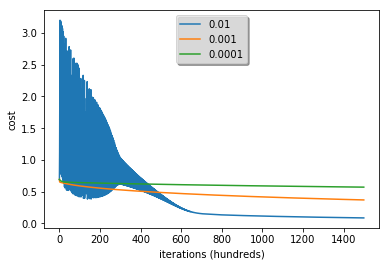

In [34]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    costs = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

# for i in learning_rates:
    plt.plot(np.squeeze(costs), label= str(i))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()